# Central Limit Theorem (CLT)

The central limit theorem (CLT) states that given a sufficiently large sample size from a population with a finite level of variance, the mean of samples drawn from a population will be approximately equal to the mean of the population, and the distribution of sample means will follow an approximate normal distribution even if the original samples themselves are not normally distributed.

The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applied to problems involving other types of distributions.

In [1]:
from __future__ import division    # for doing regular (not-integer) division
from collections import Counter    # get dict(items:cnts) for item in list(like)
import math                        # for doing maths
import random                      # for generating random numbers
import matplotlib.pyplot as plt    # for graphing
import pandas as pd                # for doing better maths

# Bernoulli Trial

A Bernoulli trial (or binomial trial) is a random experiment with exactly two possible outcomes:

    "success" [1]
        or
    "failure" [0]

The probability of success must be the same across experiments.

It is named after Jacob Bernoulli, a 17th century Swiss mathematician.

https://en.wikipedia.org/wiki/Bernoulli_trial

In more practical terms, a Bernoulli trial returns [1] with probability [p] and [0] with probability [1-p].

e.g. a fair coin returns heads [success : 1] with a probability [0.5] and tails [failure : 0] with a probability [1-0.5=0.5].

In [2]:
def bernoulli_trial(p):
    '''Generate a random number between 0 and 1. Return 1 if random number 
       is less less than p else return 0'''
    return 1 if random.random() < p else 0

Here are ten bernoulli_trials with p=0.5

In [3]:
for i in range(10):
    print bernoulli_trial(0.5)

1
0
1
1
1
1
1
0
1
1


Let's simulate a lot of bernoulli_trials and look at how the mean of all the trials (as a sample) behaves - we'll refer to this value as the sample mean.

In [4]:
p = 0.2; trials = 30

bernoulli_trials = [bernoulli_trial(p) for _ in range(trials)]

sample_p = sum(bernoulli_trials) / trials
sample_sigma = math.sqrt(sample_p * (1 - sample_p) * trials)

print 'trial results:\n{}\n'.format(bernoulli_trials)
print 'sample size:\t\t{}'.format(trials)
print
print 'population mean:\t{:.4}'.format(p * trials)
print 'population stdev:\t{:.4}'.format(math.sqrt(p * (1 - p) * trials))
print
print 'sample mean:\t\t{}'.format(sum(bernoulli_trials))
print 'sample stdev:\t\t{:.4}'.format(sample_sigma)

trial results:
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

sample size:		30

population mean:	6.0
population stdev:	2.191

sample mean:		5
sample stdev:		2.041


# Binomial Experiment
The above simulation is an example of a Binomial experiment, which is a series of identical Bernoulli trials. Specifically, a binomial experiment has the following caracteristics:

    1. There must be a fixed number of trials

    2. Each trial can have only two outcomes

    3. The outcomes of each trial must be independent of each other

    4. The probability of a success must remain the same for each trial

A binomial experiment yields a binomial distribution. The mean and standard deviation of a binomial distribution is:

    mean  = p * n
    stdev = math.sqrt(p * (1 - p) * n)
    
Let's formalize this process as a function:

In [5]:
def binomial_exp(p, n):
    '''Count the number of successes in n identical Bernoulli trials'''
    exp_mean  = sum(bernoulli_trial(p) for _ in range(n))
    exp_p     = exp_mean / n
    exp_stdev = math.sqrt(exp_p * (1 - exp_p) * n)

    return exp_mean, exp_p, exp_stdev

Let's simulate a bunch of binomial experiments each consisting of a bunch of individual bernoulli trials:

In [6]:
p = 0.5; trials = 30; exps = 30

binomial_exps = [binomial_exp(p, trials) for _ in range(exps)]
data_df = pd.DataFrame(binomial_exps, columns=['ct', 'p', 'stdev'])
sample_mean = data_df.ct.sum() / trials
sample_stdv = data_df.ct.std()

print 'experiment results:\n'
print 'sample size: {}\n'.format(trials)
print data_df 
print 'experiments:\t\t{}'.format(exps)
print
print 'population mean:\t{:.4}'.format(p * trials)
print 'population stdev:\t{:.4}'.format(math.sqrt(p * (1 - p) * trials))
print
print 'mean of sample means:\t{}'.format(sample_mean)
print 'mean of sample stdevs:\t{:.4}'.format(sample_stdv)

experiment results:

sample size: 30

    ct         p     stdev
0   18  0.600000  2.683282
1   18  0.600000  2.683282
2   21  0.700000  2.509980
3   18  0.600000  2.683282
4   16  0.533333  2.732520
5   11  0.366667  2.639444
6   16  0.533333  2.732520
7   15  0.500000  2.738613
8   17  0.566667  2.714160
9   16  0.533333  2.732520
10  15  0.500000  2.738613
11  13  0.433333  2.714160
12  15  0.500000  2.738613
13  18  0.600000  2.683282
14  17  0.566667  2.714160
15  16  0.533333  2.732520
16  20  0.666667  2.581989
17  17  0.566667  2.714160
18  20  0.666667  2.581989
19  16  0.533333  2.732520
20  18  0.600000  2.683282
21  11  0.366667  2.639444
22  14  0.466667  2.732520
23  13  0.433333  2.714160
24  17  0.566667  2.714160
25  13  0.433333  2.714160
26  16  0.533333  2.732520
27  15  0.500000  2.738613
28  15  0.500000  2.738613
29  12  0.400000  2.683282
experiments:		30

population mean:	15.0
population stdev:	2.739

mean of sample means:	15.9
mean of sample stdevs:	2.51


In [7]:
def normal_pdf(x, mu, sigma):
    """the normal probabiity density function"""
    return (math.exp( -(x - mu) ** 2 / 2 / sigma ** 2) / 
           (math.sqrt(2 * math.pi) * sigma))

In [8]:
# here's a function to simulate the experiment above and plot the results
# relative to the normal density function for the experimental mean and std

def binomial_CLT(p, n, n_trials):

    data = [binomial_exp(p, n)[0] for _ in range(n_trials)]
    data_df = pd.DataFrame(data, columns=['ct'])
    sample_mean = data_df.ct.mean()
    sample_stdv = data_df.ct.std()
    
    # bar chart binomial
    cnts = Counter(data)
    xs = [x - 0.4 for x in cnts.keys()]
    ys = [v / n_trials for v in cnts.values()]
    plt.bar(xs, ys, width=0.8, color='0.75')
    
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)

    # line chart for normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_pdf(i , mu, sigma) for i in xs]
    
    plt.plot(xs, ys)
    plt.title('Binomial Distribution vs Normal Approximation')
    plt.xlabel('p = {}, n = {}, trials = {}'.format(p, n, n_trials))
    plt.show()
    print 'sample mean:\t\t{:.5}'.format(sample_mean)
    print 'sample stdev:\t\t{:.5}'.format(sample_stdv)
    print
    print 'Population mean:\t{:.5}'.format(mu)
    print 'Population stdev:\t{:.5}'.format(sigma)
    return data_df

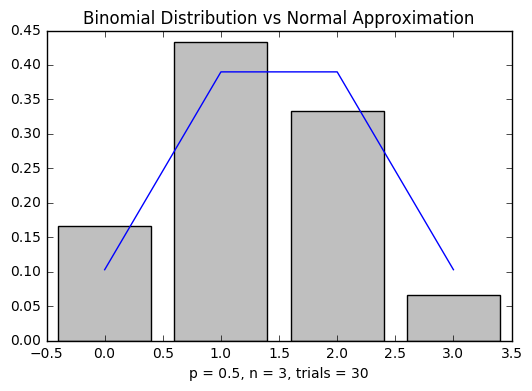

sample mean:		1.3
sample stdev:		0.83666

Population mean:	1.5
Population stdev:	0.86603


In [9]:
# experiment: sample size - 5 number of samples - 30

p = 0.5; n = 3; n_exp = 30

clt = binomial_CLT(p, n, n_exp)

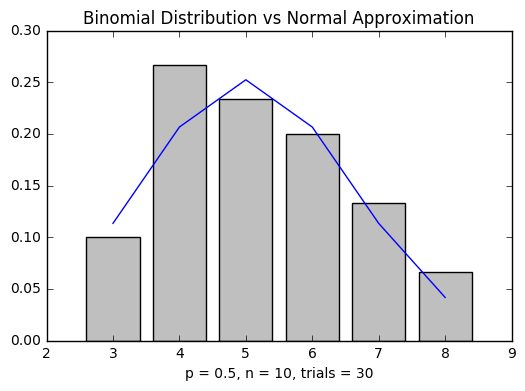

sample mean:		5.2
sample stdev:		1.4239

Population mean:	5.0
Population stdev:	1.5811


In [10]:
# experiment: sample size - 10 number of samples - 30
# the distribution approximates normal as sample size (n) increases

p = 0.5; n = 10; n_exp = 30

clt = binomial_CLT(p, n, n_exp)

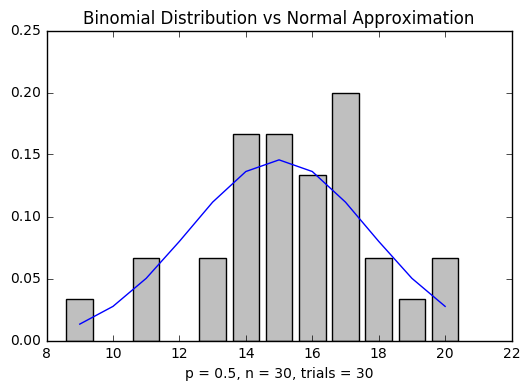

sample mean:		15.433
sample stdev:		2.5418

Population mean:	15.0
Population stdev:	2.7386


In [11]:
# experiment: sample size - 30 number of samples - 30

p = 0.5; n = 30; n_exp = 30

clt = binomial_CLT(p, n, n_exp)

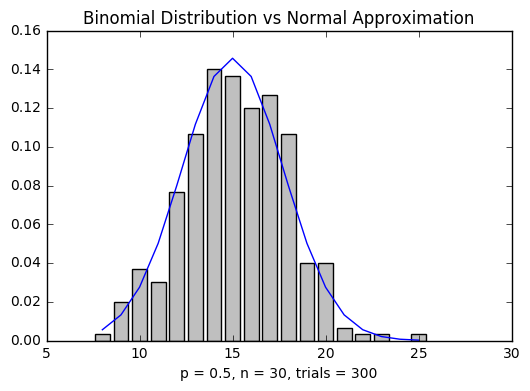

sample mean:		15.147
sample stdev:		2.778

Population mean:	15.0
Population stdev:	2.7386


In [12]:
# a sample size of 30 is sufficient to realize the CLT
# lets increase the number of samples and see how it fills out
# experiment: sample size - 30 number of samples - 300

p = 0.5; n = 30; n_exp = 300

clt = binomial_CLT(p, n, n_exp)

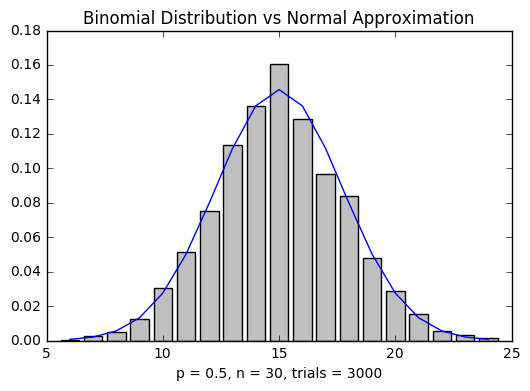

sample mean:		14.998
sample stdev:		2.7731

Population mean:	15.0
Population stdev:	2.7386


In [13]:
# experiment: sample size - 30 number of samples - 3000

p = 0.5; n = 30; n_exp = 3000

clt = binomial_CLT(p, n, n_exp)

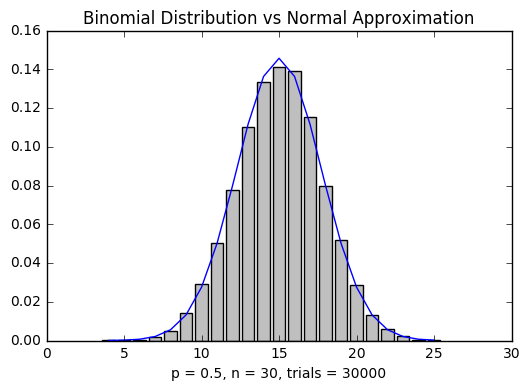

sample mean:		15.028
sample stdev:		2.746

Population mean:	15.0
Population stdev:	2.7386


In [14]:
# experiment: sample size - 30 number of samples - 30000

p = 0.5; n = 30; n_exp = 30000

clt = binomial_CLT(p, n, n_exp)

There it is!